In [2]:
import pickle
import os

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
dataset = 'mnist'
train_size = 1000
num_hidden = 3
bias = False
normalization = 'batch'
optimizer = 'sgd'
num_seeds = 5

In [127]:
log_dir = os.path.join(
    'results', 'ref_width_dependence', '{}_{}'.format(dataset, train_size), 
    'num_hidden={}_bias={}_normalization={}'.format(num_hidden, bias, normalization), optimizer)
log_dir

'results/ref_width_dependence/mnist_1000/num_hidden=3_bias=False_normalization=batch/sgd'

In [128]:
results_all_path = os.path.join(log_dir, 'results_all.dat')
if os.path.exists(results_all_path):
    with open(results_all_path, 'rb') as f:
        results_all = pickle.load(f)

In [129]:
scaling_modes = ['default', 'mean_field']
ref_widths = [32, 512, 8192]
correction_epochs = [0, None]
real_widths = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

In [130]:
def draw_curve(scaling_mode, ref_width, correction_epoch, key, **kwargs):
    data = [[results_all[scaling_mode][ref_width][correction_epoch][real_width][seed][key] for real_width in real_widths] for seed in range(num_seeds)]
    data = np.array(data)
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    plt.plot(np.log2(real_widths), data_mean, **kwargs)
    plt.fill_between(
        np.log2(real_widths),
        data_mean - data_std, data_mean + data_std,
        alpha=0.3, **kwargs
    )

In [134]:
linestyles = ['solid', 'dashed', 'dotted']
cmap = plt.get_cmap('tab10')
keys = ['final_test_loss', 'final_test_acc']
ylims = [(0.25,0.65), (0.87, 0.93)]

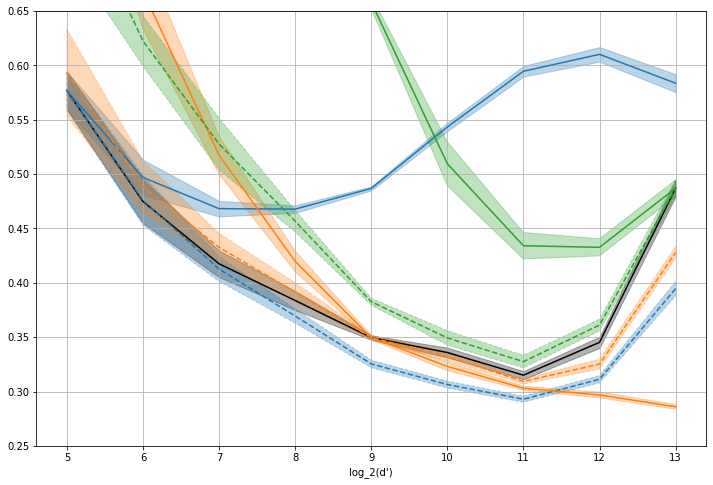

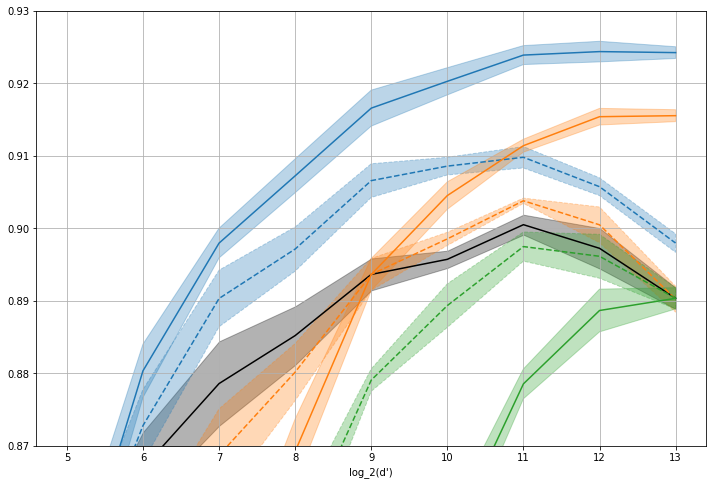

In [135]:
for key, ylim in zip(keys, ylims):
    _ = plt.figure(figsize=(12,8))

    for scaling_mode in scaling_modes:
        for i, ref_width in enumerate(ref_widths if scaling_mode != 'default' else [None]):
            for j, correction_epoch in enumerate(correction_epochs if scaling_mode != 'default' else [None]):
                if scaling_mode == 'default':
                    draw_curve(scaling_mode, ref_width, correction_epoch, key, color='black', linestyle='solid')
                else:
                    draw_curve(scaling_mode, ref_width, correction_epoch, key, color=cmap(i), linestyle=linestyles[j])

    plt.xlabel("log_2(d')")
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()